<a href="https://colab.research.google.com/github/kushu9999/ML-Supervised/blob/master/Credit_Score_and_Loan_amount_Predict_Intrestrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set_style('whitegrid')

%matplotlib inline

### Work on dataset

In [0]:
loans_data = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [0]:
loans_data.head

<bound method NDFrame.head of        Amount.Requested  ...  Employment.Length
81174             20000  ...           < 1 year
99592             19200  ...            2 years
80059             35000  ...            2 years
15825             10000  ...            5 years
33182             12000  ...            9 years
...                 ...  ...                ...
23735             30000  ...            8 years
65882             16000  ...          10+ years
55610             10000  ...          10+ years
38576              6000  ...            5 years
3116               9000  ...          10+ years

[2500 rows x 14 columns]>

In [0]:
loans_data['Loan.Length'][0:10]

81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
62403    36 months
48808    36 months
22090    60 months
76404    36 months
15867    36 months
Name: Loan.Length, dtype: object

In [0]:
loans_data['Interest.Rate'][0:10]

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
62403    15.31%
48808     7.90%
22090    17.14%
76404    14.33%
15867     6.91%
Name: Interest.Rate, dtype: object

In [0]:
loans_data['FICO.Range'][0:10]

81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
62403    670-674
48808    720-724
22090    705-709
76404    685-689
15867    715-719
Name: FICO.Range, dtype: object

In [0]:
loans_data['Monthly.Income'][0:10]

81174     6541.67
99592     4583.33
80059    11500.00
15825     3833.33
33182     3195.00
62403     4891.67
48808     2916.67
22090    13863.42
76404     3150.00
15867     5000.00
Name: Monthly.Income, dtype: float64

In [0]:
loans_data.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

# Now We have to pre-proces the dataset
We will use those data what we have to use (loan length,intrest rate , FICO range,Monthly income)
other data we'll remove 
converting data intp pure Numeric format
we'll remove "%" ,"Months" etc these things 

In [0]:
loans = pd.read_csv("/content/drive/My Drive/YT-Data/loan.csv")

In [0]:
loans.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
6,15.31,670,36,4891.67,6000
11,19.72,670,36,3575.00,2000
12,14.27,665,36,4250.00,10625
13,21.67,670,60,14166.67,28000
21,21.98,665,36,6666.67,22000


# Visulize the data

Histogram of FICO Score

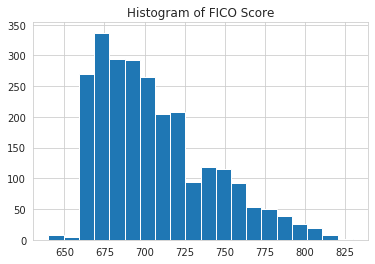

In [0]:
plt.figure()
plt.title("Histogram of FICO Score")

loans = pd.read_csv("/content/drive/My Drive/YT-Data/loan.csv")
fico  = loans['FICO.Score']
fico.hist(bins = 20)

Text(0, 0.5, 'Intrest Rate')

<Figure size 432x288 with 0 Axes>

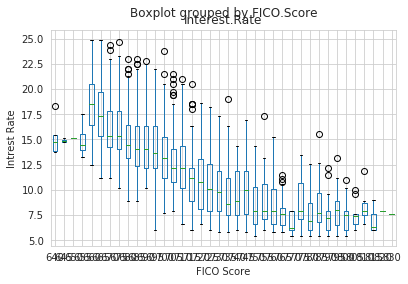

In [0]:
plt.figure()
loans = pd.read_csv("/content/drive/My Drive/YT-Data/loan.csv")
x = loans.boxplot('Interest.Rate','FICO.Score')
x.set_xlabel("FICO Score")
x.set_ylabel("Intrest Rate")

# Analysis the data

In [0]:
int_rate  = loans['Interest.Rate']
loan_amt = loans['Loan.Amount']
fico_score = loans['FICO.Score']


In [0]:
y = loans.iloc[:,0]

In [0]:
X1 = loans.iloc[:,1]
X2 = loans.iloc[:,4]

In [0]:
X1

6       670
11      670
12      665
13      670
21      665
       ... 
2472    770
2481    760
2482    810
2486    765
2497    740
Name: FICO.Score, Length: 2500, dtype: int64

In [0]:
X2

6        6000
11       2000
12      10625
13      28000
21      22000
        ...  
2472    19000
2481    10000
2482    27000
2486    25000
2497    16000
Name: Loan.Amount, Length: 2500, dtype: int64

In [0]:
y

6       15.31
11      19.72
12      14.27
13      21.67
21      21.98
        ...  
2472     7.90
2481     6.03
2482     6.62
2486    10.75
2497    14.09
Name: Interest.Rate, Length: 2500, dtype: float64

In [0]:
X = np.column_stack([X1,X2])

In [0]:
X

array([[  670,  6000],
       [  670,  2000],
       [  665, 10625],
       ...,
       [  810, 27000],
       [  765, 25000],
       [  740, 16000]])

In [0]:
X3 = sm.add_constant(X)

# Making Model

In [0]:
model  = sm.OLS(y,X3)

In [0]:
A = model.fit()

In [0]:
print("the P values are : ",A.pvalues)
print("The R-squred value is : ",A.rsquared)

the P values are :  const     0.000000e+00
x1        0.000000e+00
x2       5.969730e-203
dtype: float64
The R-squred value is :  0.6566326246493588
